In [21]:
import os
import pandas as pd
import re

results_folder = "kp_results/low-dimensional"
data = []

for file_name in os.listdir(results_folder):
    if not file_name.endswith(".result"):
        continue
    
    with open(os.path.join(results_folder, file_name)) as f:
        lines = f.readlines()
    
    instance = None
    algo = None
    best_value = None
    exec_time = None
    memory = None
    rel_error = None

    for line in lines:
        line = line.strip()
        if line.startswith("Instance:"):
            instance = line.split(":", 1)[1].strip()
        elif line.startswith("---"):
            algo = line.replace("-", "").strip()
        elif line.startswith("Best Value:"):
            best_value = line.split(":", 1)[1].strip()
        elif line.startswith("Execution Time:"):
            exec_time = line.split(":", 1)[1].strip().split()[0]
        elif line.startswith("Memory Usage:"):
            memory = line.split(":", 1)[1].strip().split()[0]
        elif line.startswith("Relative Error:"):
            rel_error = line.split(":", 1)[1].strip()
            # fim de um bloco
            data.append({
                "instance": instance,
                "algorithm": algo,
                "best_value": float(best_value) if best_value != "NA" else None,
                "exec_time": float(exec_time) if exec_time != "NA" else None,
                "memory_bytes": float(memory) if memory != "NA" else None,
                "relative_error": float(rel_error) if rel_error != "NA" else None,
            })


In [22]:
df = pd.DataFrame(data)
print(df.head())

# exportar para CSV
df.to_csv("kp_results/low-dimensional/all_results.csv", index=False)


           instance                   algorithm  best_value  exec_time  \
0  f2_l-d_kp_20_878  Branch and Bound Algorithm    1024.000     0.0117   
1  f2_l-d_kp_20_878     FPTAS Algorithm (ε=0.8)     990.080     0.0027   
2  f2_l-d_kp_20_878     FPTAS Algorithm (ε=0.5)    1001.000     0.0050   
3  f2_l-d_kp_20_878     FPTAS Algorithm (ε=0.1)    1019.655     0.0177   
4  f2_l-d_kp_20_878        Two Approx Algorithm    1018.000     0.0000   

   memory_bytes  relative_error  
0        2928.0          0.0000  
1        6912.0          0.0331  
2       11184.0          0.0225  
3       56976.0          0.0042  
4          72.0          0.0059  


In [24]:
import pandas as pd
import re

df = pd.read_csv("kp_results/low-dimensional/all_results.csv")

# extrair número de itens e capacidade do nome da instância
def extract_n_items(instance_name):
    match = re.search(r"kp_(\d+)_", instance_name)
    if match:
        return int(match.group(1))
    # fallback
    parts = instance_name.split("_")
    return int(parts[-2])

def extract_capacity(instance_name):
    parts = instance_name.split("_")
    return int(parts[-1])

df['n_items'] = df['instance'].apply(extract_n_items)
df['capacity'] = df['instance'].apply(extract_capacity)

print(df.head())


           instance                   algorithm  best_value  exec_time  \
0  f2_l-d_kp_20_878  Branch and Bound Algorithm    1024.000     0.0117   
1  f2_l-d_kp_20_878     FPTAS Algorithm (ε=0.8)     990.080     0.0027   
2  f2_l-d_kp_20_878     FPTAS Algorithm (ε=0.5)    1001.000     0.0050   
3  f2_l-d_kp_20_878     FPTAS Algorithm (ε=0.1)    1019.655     0.0177   
4  f2_l-d_kp_20_878        Two Approx Algorithm    1018.000     0.0000   

   memory_bytes  relative_error  n_items  capacity  
0        2928.0          0.0000       20       878  
1        6912.0          0.0331       20       878  
2       11184.0          0.0225       20       878  
3       56976.0          0.0042       20       878  
4          72.0          0.0059       20       878  


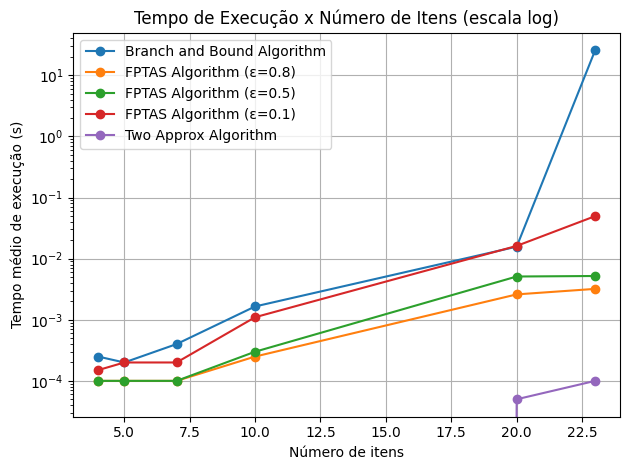

In [25]:
import matplotlib.pyplot as plt

plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_n = subset.groupby('n_items')['exec_time'].mean()
    plt.plot(mean_by_n.index, mean_by_n.values, marker='o', label=algo)

plt.xlabel("Número de itens")
plt.ylabel("Tempo médio de execução (s)")
plt.yscale("log")
plt.title("Tempo de Execução x Número de Itens (escala log)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/low-dimensional/graphs/grafico1_exec_vs_nitems.png", dpi=300)
plt.show()


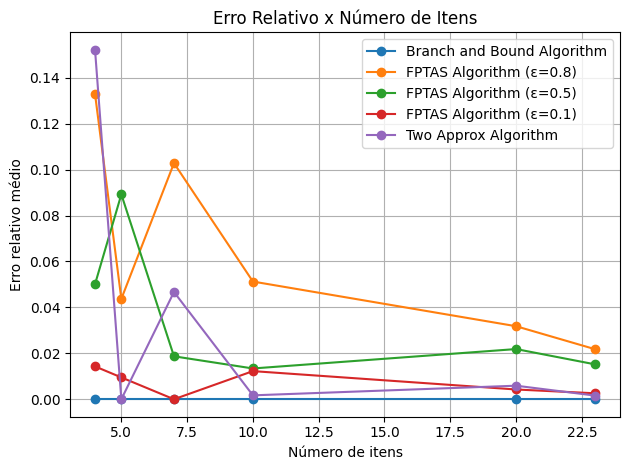

In [26]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_n = subset.groupby('n_items')['relative_error'].mean()
    plt.plot(mean_by_n.index, mean_by_n.values, marker='o', label=algo)

plt.xlabel("Número de itens")
plt.ylabel("Erro relativo médio")
plt.title("Erro Relativo x Número de Itens")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/low-dimensional/graphs/grafico2_err_vs_nitems.png", dpi=300)
plt.show()


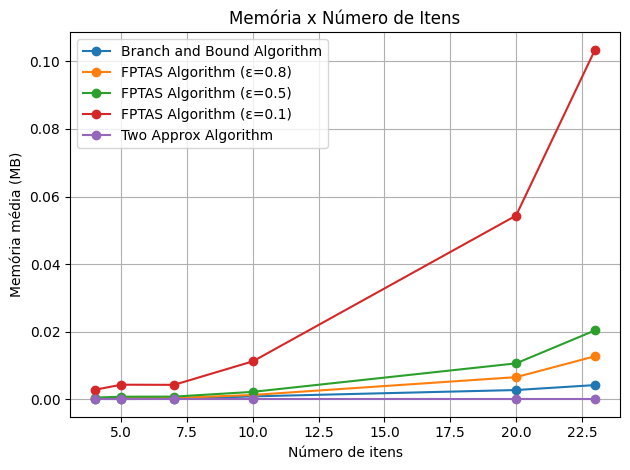

In [27]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_n = subset.groupby('n_items')['memory_bytes'].mean() / (1024 * 1024)  # MB
    plt.plot(mean_by_n.index, mean_by_n.values, marker='o', label=algo)

plt.xlabel("Número de itens")
plt.ylabel("Memória média (MB)")
plt.title("Memória x Número de Itens")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/low-dimensional/graphs/grafico3_mem_vs_nitems.png", dpi=300)
plt.show()


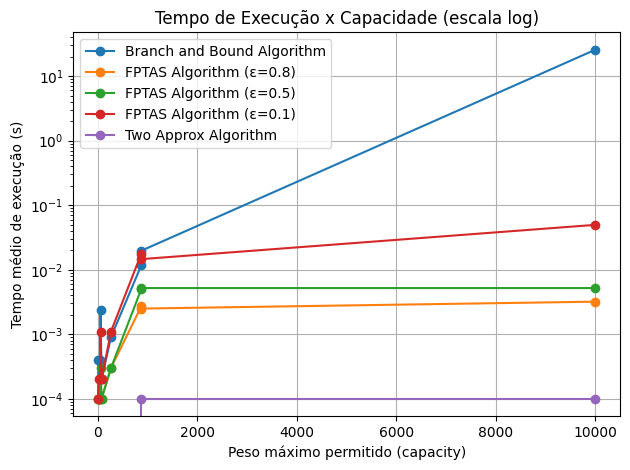

In [28]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_capacity = subset.groupby('capacity')['exec_time'].mean()
    plt.plot(mean_by_capacity.index, mean_by_capacity.values, marker='o', label=algo)

plt.xlabel("Peso máximo permitido (capacity)")
plt.ylabel("Tempo médio de execução (s)")
plt.yscale("log")  # para lidar com outliers
plt.title("Tempo de Execução x Capacidade (escala log)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/low-dimensional/graphs/grafico4_exec_vs_capacity.png", dpi=300)
plt.show()


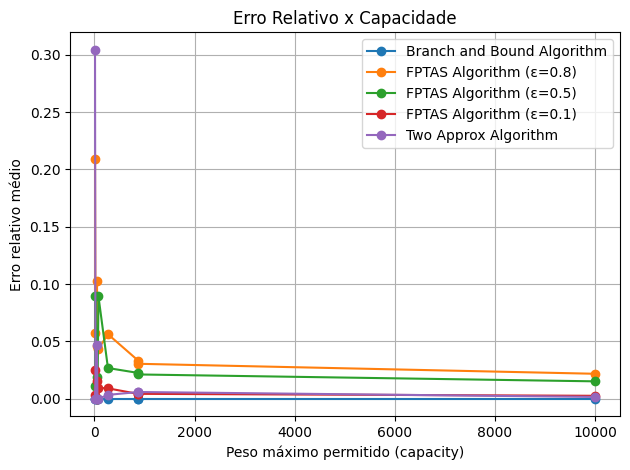

In [29]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_capacity = subset.groupby('capacity')['relative_error'].mean()
    plt.plot(mean_by_capacity.index, mean_by_capacity.values, marker='o', label=algo)

plt.xlabel("Peso máximo permitido (capacity)")
plt.ylabel("Erro relativo médio")
plt.title("Erro Relativo x Capacidade")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/low-dimensional/graphs/grafico5_err_vs_capacity.png", dpi=300)
plt.show()


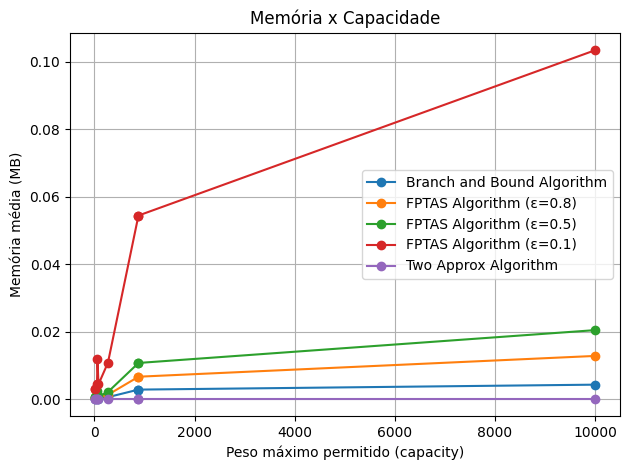

In [30]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_capacity = subset.groupby('capacity')['memory_bytes'].mean() / (1024 * 1024)
    plt.plot(mean_by_capacity.index, mean_by_capacity.values, marker='o', label=algo)

plt.xlabel("Peso máximo permitido (capacity)")
plt.ylabel("Memória média (MB)")
plt.title("Memória x Capacidade")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/low-dimensional/graphs/grafico6_mem_vs_capacity.png", dpi=300)
plt.show()


In [36]:
import os
import pandas as pd
import re

results_folder = "kp_results/large_scale"
data = []

for file_name in os.listdir(results_folder):
    if not file_name.endswith(".result"):
        continue
    
    with open(os.path.join(results_folder, file_name)) as f:
        lines = f.readlines()
    
    instance = None
    algo = None
    best_value = None
    exec_time = None
    memory = None
    rel_error = None

    for line in lines:
        line = line.strip()
        if line.startswith("Instance:"):
            instance = line.split(":", 1)[1].strip()
        elif line.startswith("---"):
            algo = line.replace("-", "").strip()
        elif line.startswith("Best Value:"):
            best_value = line.split(":", 1)[1].strip()
        elif line.startswith("Execution Time:"):
            exec_time = line.split(":", 1)[1].strip().split()[0]
        elif line.startswith("Memory Usage:"):
            memory = line.split(":", 1)[1].strip().split()[0]
        elif line.startswith("Relative Error:"):
            rel_error = line.split(":", 1)[1].strip()
            # fim de um bloco
            data.append({
                "instance": instance,
                "algorithm": algo,
                "best_value": float(best_value) if best_value != "NA" else None,
                "exec_time": float(exec_time) if exec_time != "NA" else None,
                "memory_bytes": float(memory) if memory != "NA" else None,
                "relative_error": float(rel_error) if rel_error != "NA" else None,
            })
df = pd.DataFrame(data)
print(df.head())

# exportar para CSV
df.to_csv("kp_results/large_scale/all_results.csv", index=False)

               instance                   algorithm  best_value  exec_time  \
0  knapPI_3_1000_1000_1  Branch and Bound Algorithm         NaN        NaN   
1  knapPI_3_1000_1000_1     FPTAS Algorithm (ε=0.8)         NaN        NaN   
2  knapPI_3_1000_1000_1     FPTAS Algorithm (ε=0.5)         NaN        NaN   
3  knapPI_3_1000_1000_1     FPTAS Algorithm (ε=0.1)         NaN        NaN   
4  knapPI_3_1000_1000_1        Two Approx Algorithm     14374.0       0.07   

   memory_bytes  relative_error  
0           NaN             NaN  
1           NaN             NaN  
2           NaN             NaN  
3           NaN             NaN  
4          72.0          0.0011  


In [37]:
import pandas as pd
import os

# caminho para resultados
RESULTS_CSV = "kp_results/large_scale/all_results.csv"

# pasta onde estão os arquivos .data já processados
PROCESSED_FOLDER = "kp_processed_instances/large_scale"

# carrega os resultados
df = pd.read_csv(RESULTS_CSV)

# adicionaremos as colunas reais
df["n_items_real"] = None
df["capacity_real"] = None

for idx, row in df.iterrows():
    instance = row["instance"]

    # caminho do arquivo .data
    datafile = os.path.join(PROCESSED_FOLDER, instance)
    if not os.path.exists(datafile):
        print(f"Arquivo não encontrado para {instance}, ignorando...")
        continue

    try:
        with open(datafile, "r") as f:
            first_line = f.readline().strip().split()
            n_items_real = int(first_line[0])
            capacity_real = int(first_line[1])

            df.at[idx, "n_items_real"] = n_items_real
            df.at[idx, "capacity_real"] = capacity_real

    except Exception as e:
        print(f"Falha ao ler {datafile}: {e}")

# salva nova versão
df.to_csv("kp_results/large_scale/all_results_large.csv", index=False)

print("Arquivo all_results_large.csv gerado com n_items e capacity reais!")


Arquivo all_results_large.csv gerado com n_items e capacity reais!


In [38]:
df = pd.read_csv("kp_results/large_scale/all_results_large.csv")
df['n_items'] = df['n_items_real']
df['capacity'] = df['capacity_real']

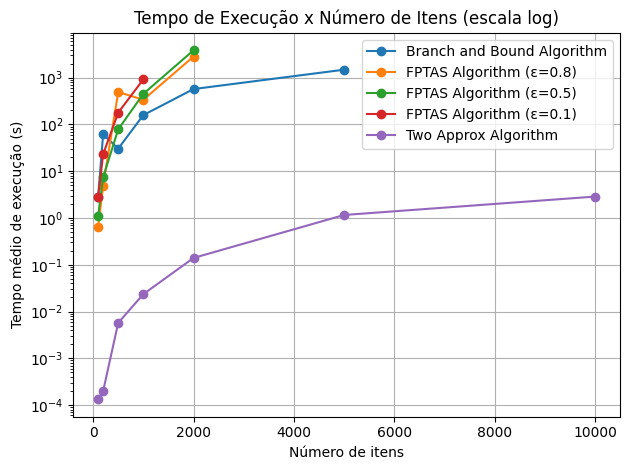

In [39]:
import matplotlib.pyplot as plt

plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_n = subset.groupby('n_items')['exec_time'].mean()
    plt.plot(mean_by_n.index, mean_by_n.values, marker='o', label=algo)

plt.xlabel("Número de itens")
plt.ylabel("Tempo médio de execução (s)")
plt.yscale("log")
plt.title("Tempo de Execução x Número de Itens (escala log)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/large_scale/graphs/grafico1_exec_vs_nitems.png", dpi=300)
plt.show()


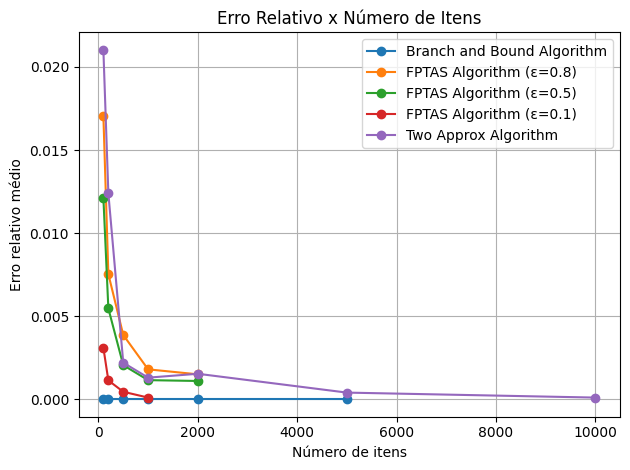

In [41]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_n = subset.groupby('n_items')['relative_error'].mean()
    plt.plot(mean_by_n.index, mean_by_n.values, marker='o', label=algo)

plt.xlabel("Número de itens")
plt.ylabel("Erro relativo médio")
plt.title("Erro Relativo x Número de Itens")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/large_scale/graphs/grafico2_err_vs_nitems.png", dpi=300)
plt.show()

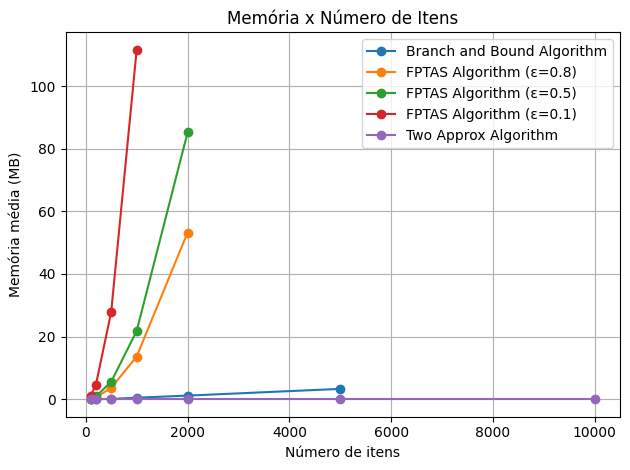

In [42]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_n = subset.groupby('n_items')['memory_bytes'].mean() / (1024 * 1024)  # MB
    plt.plot(mean_by_n.index, mean_by_n.values, marker='o', label=algo)

plt.xlabel("Número de itens")
plt.ylabel("Memória média (MB)")
plt.title("Memória x Número de Itens")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/large_scale/graphs/grafico3_mem_vs_nitems.png", dpi=300)
plt.show()


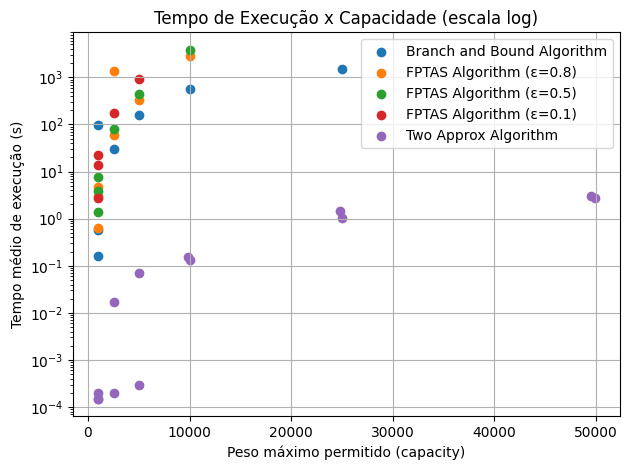

In [43]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_capacity = subset.groupby('capacity')['exec_time'].mean()
    plt.scatter(mean_by_capacity.index, mean_by_capacity.values, label=algo)

plt.xlabel("Peso máximo permitido (capacity)")
plt.ylabel("Tempo médio de execução (s)")
plt.yscale("log")  # para lidar com outliers
plt.title("Tempo de Execução x Capacidade (escala log)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/large_scale/graphs/grafico4_exec_vs_capacity.png", dpi=300)
plt.show()


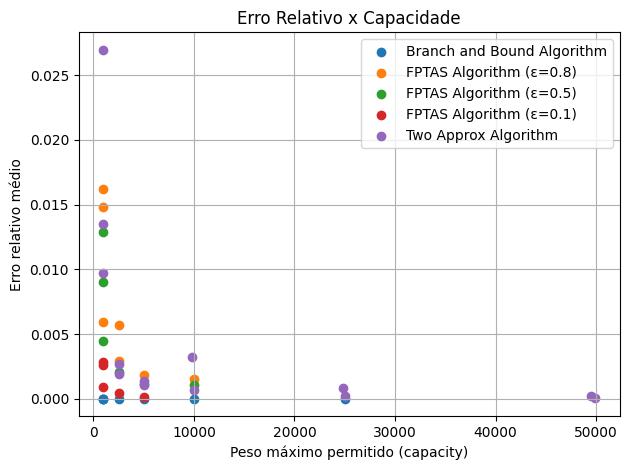

In [44]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_capacity = subset.groupby('capacity')['relative_error'].mean()
    plt.scatter(mean_by_capacity.index, mean_by_capacity.values, label=algo)

plt.xlabel("Peso máximo permitido (capacity)")
plt.ylabel("Erro relativo médio")
plt.title("Erro Relativo x Capacidade")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/large_scale/graphs/grafico5_err_vs_capacity.png", dpi=300)
plt.show()

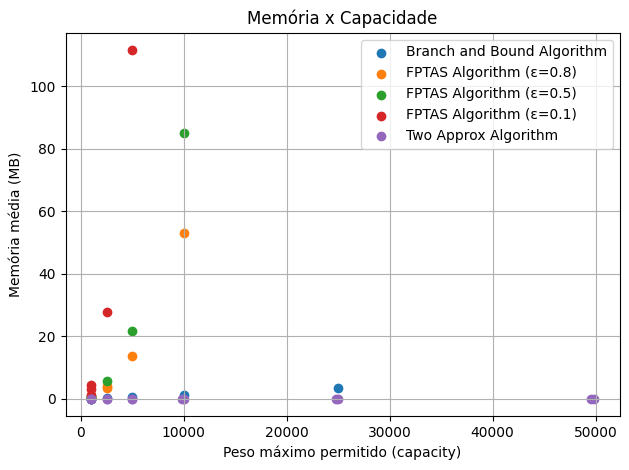

In [50]:
plt.figure()

for algo in df['algorithm'].unique():
    subset = df[df['algorithm'] == algo]
    mean_by_capacity = subset.groupby('capacity')['memory_bytes'].mean() / (1024 * 1024)  # MB
    plt.scatter(mean_by_capacity.index, mean_by_capacity.values, label=algo)

plt.xlabel("Peso máximo permitido (capacity)")
plt.ylabel("Memória média (MB)")
plt.title("Memória x Capacidade")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("kp_results/large_scale/graphs/grafico6_mem_vs_capacity.png", dpi=300)
plt.show()
